In [4]:
import pandas as pd
import seaborn as sns
wine_df = pd.read_csv('data/wine.csv')

In [5]:
# 4.1 Сколько всего дегустаторов приняло участие в винных обзорах?
wine_df['taster_name'].nunique()

19

In [6]:
# 4.2 Какова максимальная цена за бутылку в этом наборе данных? Введите целое число
round(wine_df['price'].max())

3300

In [7]:
# 5.2 Проанализируйте представленный датасет и перечислите все числовые признаки через запятую.
wine_df.info()

# points, price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [8]:
# 5.3 Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их.
mask = wine_df.duplicated()
wine_duplicated = wine_df[mask]
print(f'Число дубликатов составило: {wine_duplicated.shape[0]}')
wine_duplicated = wine_duplicated.drop_duplicates()

Число дубликатов составило: 9983


In [9]:
# 5.4 Проверьте датасет на наличие пропусков в данных. В каких признаках были обнаружены пропуски?
cols_null_precent = wine_duplicated.isnull().mean() * 100
cols_null = cols_null_precent[cols_null_precent > 0].sort_values(ascending=False)
display(cols_null)

region_2                 62.516278
designation              29.249725
taster_twitter_handle    17.700090
region_1                 16.898728
taster_name              13.292597
price                     6.020234
province                  0.040068
country                   0.040068
dtype: float64

In [10]:
# 5.5 Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в модуле PYTHON-14. Очистка данных.

df = wine_duplicated.drop(['region_2'], axis=1) # имеет порядка 60% пропусков, лучше избавиться от такого признака

<Axes: >

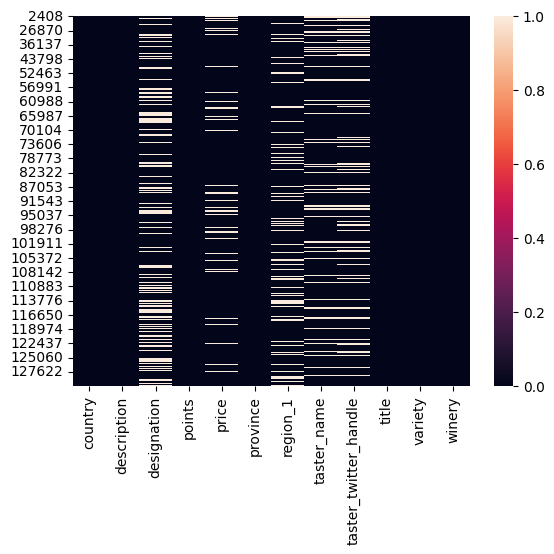

In [11]:
sns.heatmap(df.isnull()) # смотрим, какие признаки остались

In [12]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

df['designation'] = df['designation'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
df['country'] = df['country'].fillna('US')
df['price'] = df['price'].fillna(df['price'].mean())
df['province'] = df['province'].fillna('California')
df['variety'] = df['variety'].fillna('Pinot Noir')

In [13]:
# в числовом признаке выберем метод замены средним значением
df['price'] = df['price'].fillna(df['price'].mean())

<Axes: >

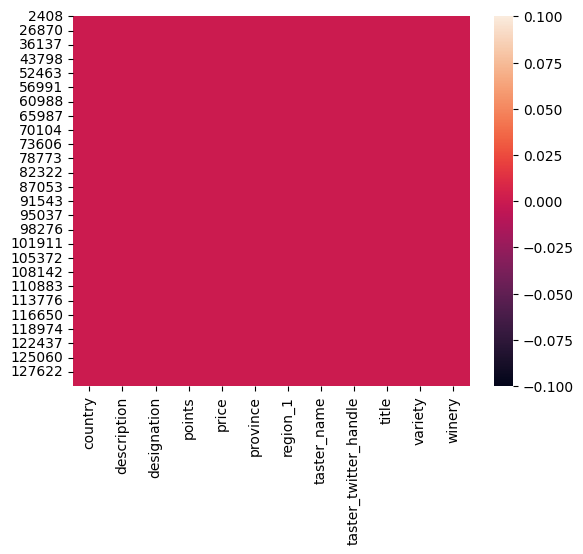

In [14]:
sns.heatmap(df.isnull()) # убеждаемся, что датасет без пропусков

In [15]:
df = df.to_csv('data/wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы

## <center> YDATA-Profiling <center>

In [16]:
from ydata_profiling import ProfileReport
df = pd.read_csv('data/wine.csv')

In [17]:
profile = ProfileReport(df, title='Pandas Profiling Report')

In [19]:
profile.to_file("data/your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## <center> SWEETVIZ <center>

Sweetviz — это библиотека автоматического анализа с открытым исходным кодом. Sweetviz также можно использовать для сравнения нескольких наборов данных и выводов по ним. Это может быть удобно, когда необходимо сравнить обучающий и тестовый наборы данных. 

In [21]:
import sweetviz as sv

df = pd.read_csv('data/wine.csv')

In [ ]:
# Чтобы проанализировать набор данных, просто используйте функцию analyze(), а затем — show_html():
report = sv.analyze(df)
report.show_html()

## <center> D-Tale <center>

D-Tale — это библиотека с открытым исходным кодом. D-Tale делает подробный разведывательный анализ набора данных. Интересная особенность: библиотека предоставляет функцию экспорта кода для каждого графика или элемента анализа в отчёте.

In [23]:
import dtale

df = pd.read_csv('data/wine.csv')

In [ ]:
d = dtale.show(df)
d

2025-06-06 16:22:44,627 - INFO     - Executing shutdown due to inactivity...
2025-06-07 17:43:23,329 - INFO     - Executing shutdown due to inactivity...
